# 基础图表

## 读取数据

In [1]:
import pandas as pd

data = pd.read_csv('海康威视_clean_MaxMin.csv')
data = data[-200:]

## 均线

<AxesSubplot:>

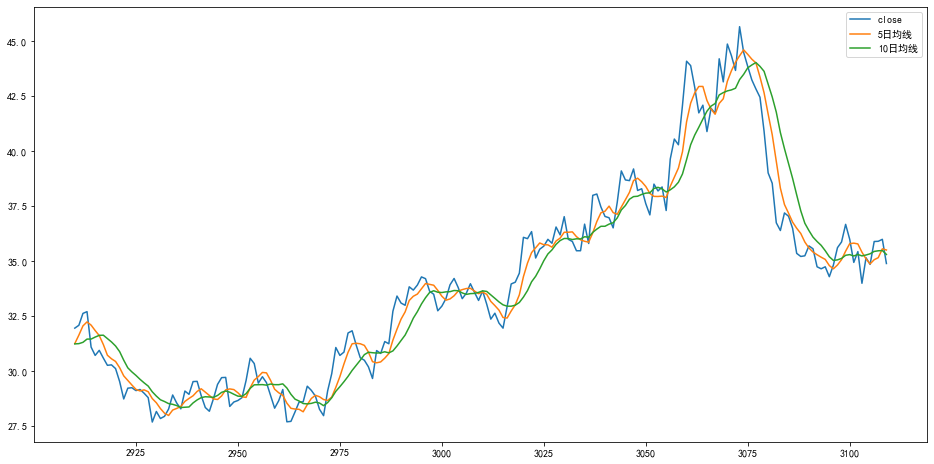

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'  # 指定中文字体，如宋体或黑体
plt.figure(figsize=(16,8))
data['close'].plot(legend=True)
data['5日均线'].plot(legend=True)
data['10日均线'].plot(legend=True)

## 交易量

<AxesSubplot:>

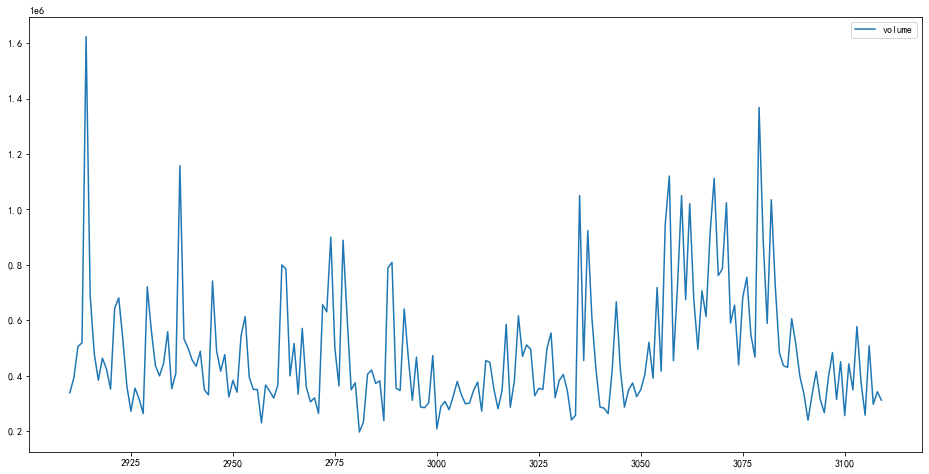

In [3]:
plt.figure(figsize=(16,8))
data['volume'].plot(legend=True)  # 交易量与股价走势 相关性

## 涨幅

<AxesSubplot:>

C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


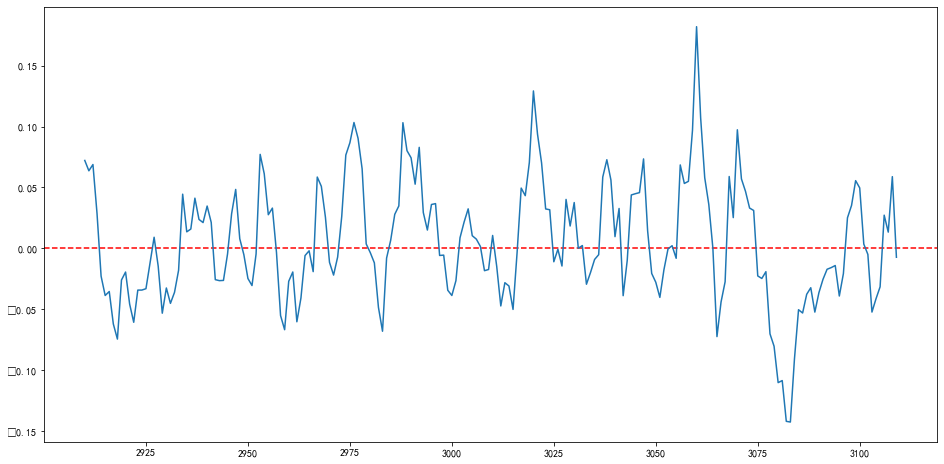

In [4]:
import numpy as np
plt.figure(figsize=(16,8))
# 添加0基准线
plt.axhline(0, color='red', linestyle='--')
data['涨幅'].plot(legend=True)  # 交易量与股价走势 相关性


## RSI

<AxesSubplot:>

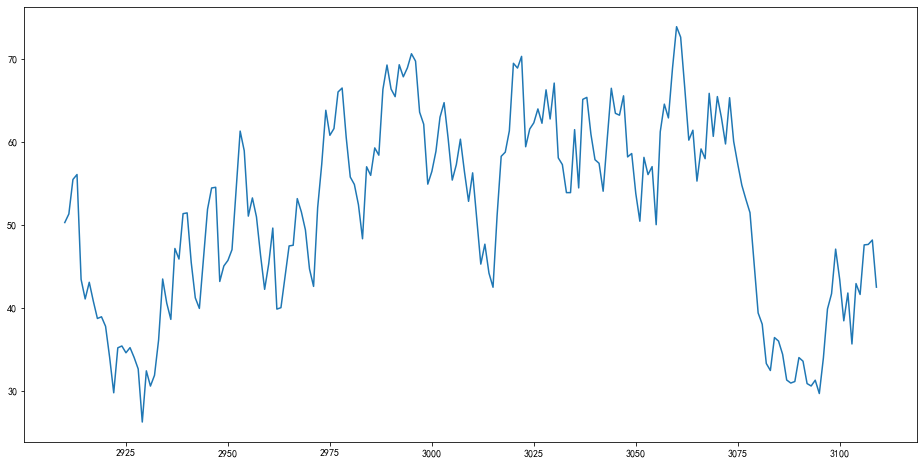

In [5]:
# import talib 
# 假设您已经有了一个名为df的DataFrame对象，其中包含日期（在df.index中）和收盘价（在df['close']中）
# 计算RSI指标  相对强弱指标  
# RSI指标基本原理： 
# 通过测量一段时间间内股价上涨总幅度占股价变化总幅度平均值的百分比来评估多空力量的强弱程度， 其能够反映出市场在一定时期内的景气程度
plt.figure(figsize=(16,8))
data['RSI'].plot(legend=True)

## MACD、macdsignal、macdhist
MACD线、信号线（signal line,MACD线的9日指数移动均线）、离差图（divergence histogram）
macd（对应diff）
macdsignal（对应dea）
macdhist（对应macd）

C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


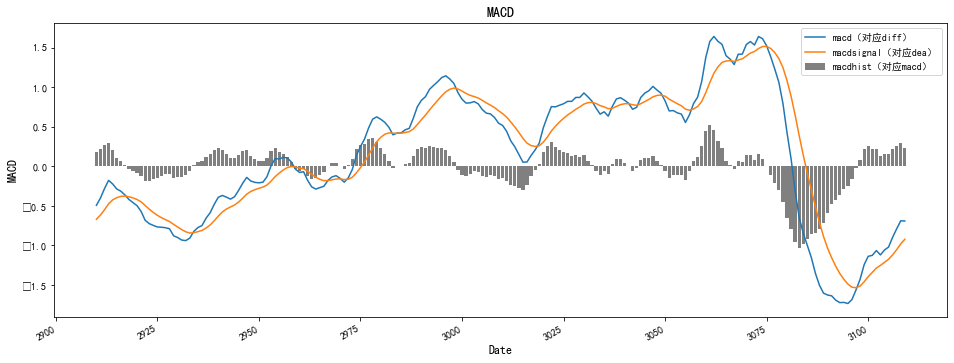

In [6]:
# MACD指标
df = data
# 创建图形对象和子图对象
fig, ax = plt.subplots(figsize=(16, 6))

# 绘制MACD线
ax.plot(df.index, data['MACD'], label='macd（对应diff）')
# 绘制信号线
ax.plot(df.index, data['MACD_Signal'], label='macdsignal（对应dea）')
# 绘制柱状图
ax.bar(df.index, data['MACD_Histogram'], label='macdhist（对应macd）', color='gray')

# 设置图表标题和轴标签
ax.set_title('MACD', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('MACD', fontsize=12)

# 设置图例
ax.legend()

# 自动调整日期显示格式
fig.autofmt_xdate()

# 显示图表
plt.show()
# 然后按照下面的原则判断买入还是卖出。       
# 1.DIFF、DEA均为正，DIFF向上突破DEA，买入信号。       
# 2.DIFF、DEA均为负，DIFF向下跌破DEA，卖出信号。       
# 3.DEA线与K线发生背离，行情反转信号。       
# 4.分析MACD柱状线，由正变负，卖出信号；由负变正，买入信号。

# 特征预测

## close预测

Epoch 1/50
25/25 [==============================] - 5s 8ms/step - loss: 0.0674
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0076
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 5/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 6/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 7/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0023
Epoch 8/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 9/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0023
Epoch 10/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 11/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 12/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 13/50
25/25 [============================

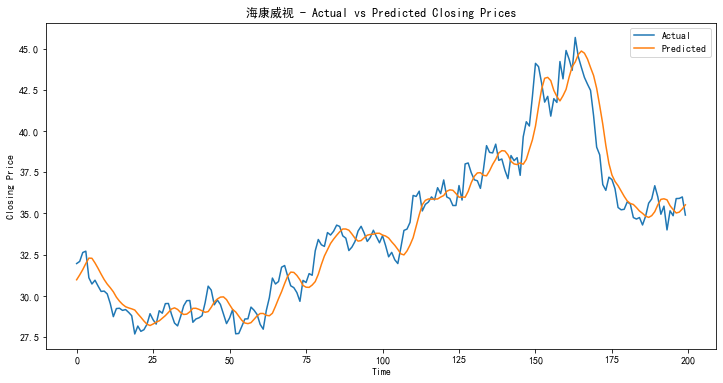

均方误差 (MSE):  1.2686776836585576
均方根误差 (RMSE):  1.1263559311596658


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-1000:]  # 假设数据存储在名为google_stock_data.csv的文件中

# 提取收盘价列
close_prices = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_data)):
    X_train.append(train_data[i - window_size:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_data[len(scaled_data) - len(test_data) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i, 0])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_data)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('海康威视 - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()
# 预测效果滞后（每一步都在亏损）

# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## MACD预测

Epoch 1/50
50/50 [==============================] - 5s 8ms/step - loss: 0.0707
Epoch 2/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0567
Epoch 3/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0560
Epoch 4/50
50/50 [==============================] - 0s 10ms/step - loss: 0.0566
Epoch 5/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0560
Epoch 6/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0558
Epoch 7/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0556
Epoch 8/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0541
Epoch 9/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0501
Epoch 10/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0507
Epoch 11/50
50/50 [==============================] - 0s 10ms/step - loss: 0.0498
Epoch 12/50
50/50 [==============================] - 0s 10ms/step - loss: 0.0499
Epoch 13/50
50/50 [===========================

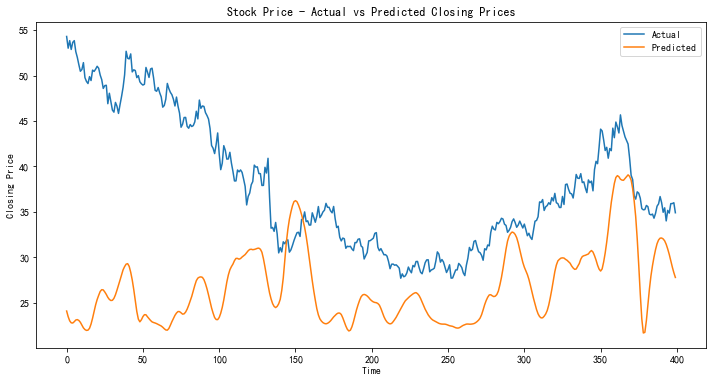

均方误差 (MSE):  189.4033466600799
均方根误差 (RMSE):  13.762388842787429


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-2000:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['MACD']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## MACD_Signal

Epoch 1/50
38/38 [==============================] - 5s 10ms/step - loss: 0.0725
Epoch 2/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0543
Epoch 3/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0531
Epoch 4/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0528
Epoch 5/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0530
Epoch 6/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0524
Epoch 7/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0523
Epoch 8/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0524
Epoch 9/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0525
Epoch 10/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0521
Epoch 11/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0520
Epoch 12/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0517
Epoch 13/50
38/38 [===================

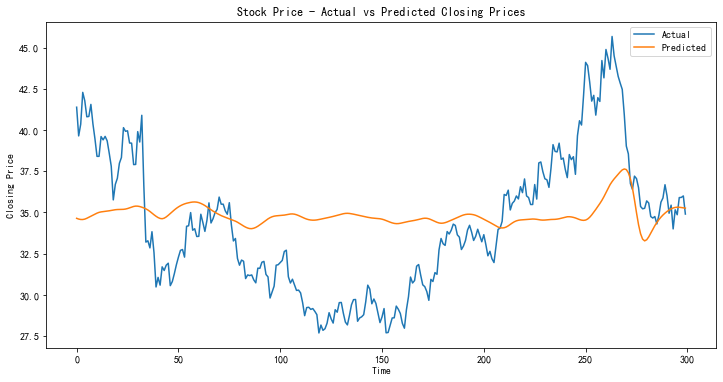

均方误差 (MSE):  16.11720764527976
均方根误差 (RMSE):  4.01462422217569


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-1500:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['MACD_Signal']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## *MACD_Histogram

Epoch 1/50
38/38 [==============================] - 6s 8ms/step - loss: 0.0731
Epoch 2/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0569
Epoch 3/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0550
Epoch 4/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0545
Epoch 5/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0554
Epoch 6/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0545
Epoch 7/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0544
Epoch 8/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0553
Epoch 9/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0541
Epoch 10/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0551
Epoch 11/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0550
Epoch 12/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0540
Epoch 13/50
38/38 [==============================

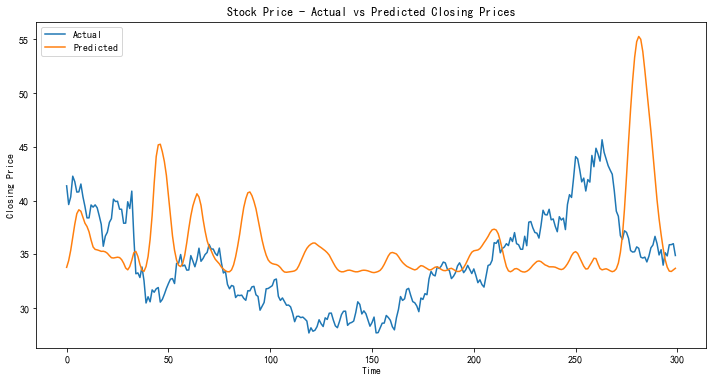

均方误差 (MSE):  35.33471363557344
均方根误差 (RMSE):  5.944300937500847


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-1500:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['MACD_Histogram']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## *MACD,MACD_Signal,MACD_Histogram

Epoch 1/50
38/38 [==============================] - 5s 9ms/step - loss: 0.0688
Epoch 2/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0546
Epoch 3/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0535
Epoch 4/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0537
Epoch 5/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0522
Epoch 6/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0527
Epoch 7/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0504
Epoch 8/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0510
Epoch 9/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0501
Epoch 10/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0495
Epoch 11/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0500
Epoch 12/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0503
Epoch 13/50
38/38 [=====================

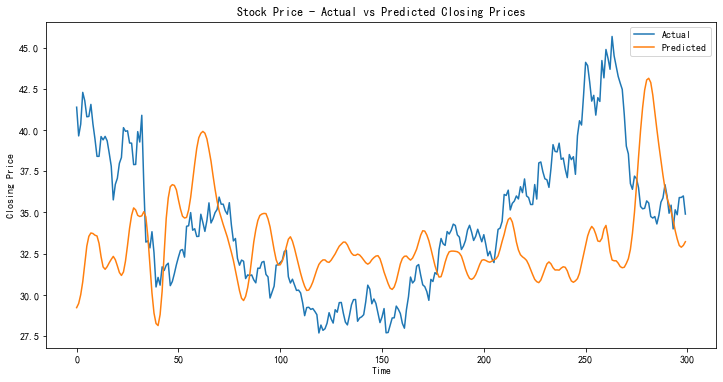

均方误差 (MSE):  23.678207016412127
均方根误差 (RMSE):  4.866025792822324


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-1500:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['MACD','MACD_Signal','MACD_Histogram']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## RSI预测

Epoch 1/50
38/38 [==============================] - 5s 9ms/step - loss: 0.0731
Epoch 2/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0566
Epoch 3/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0565
Epoch 4/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0561
Epoch 5/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0542
Epoch 6/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0547
Epoch 7/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0548
Epoch 8/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0538
Epoch 9/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0544
Epoch 10/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0542
Epoch 11/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0542
Epoch 12/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0539
Epoch 13/50
38/38 [=============================

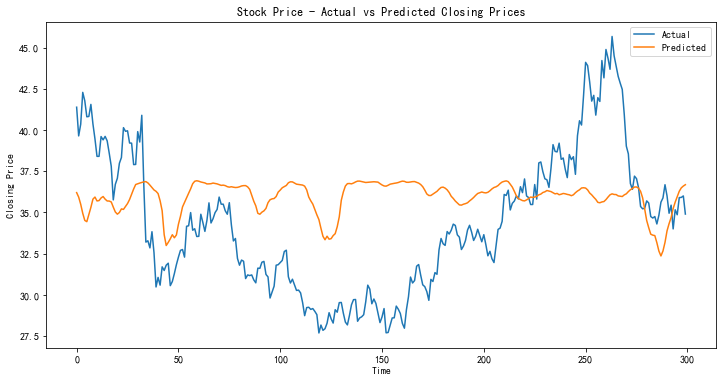

均方误差 (MSE):  21.39762122349536
均方根误差 (RMSE):  4.625756286651445


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-1500:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['RSI']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## **volume

Epoch 1/50
50/50 [==============================] - 5s 10ms/step - loss: 0.0689
Epoch 2/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0529
Epoch 3/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0527
Epoch 4/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0522
Epoch 5/50
50/50 [==============================] - 1s 12ms/step - loss: 0.0531
Epoch 6/50
50/50 [==============================] - 1s 12ms/step - loss: 0.0495
Epoch 7/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0445
Epoch 8/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0442
Epoch 9/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0438
Epoch 10/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0434
Epoch 11/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0441
Epoch 12/50
50/50 [==============================] - 1s 10ms/step - loss: 0.0434
Epoch 13/50
50/50 [===================

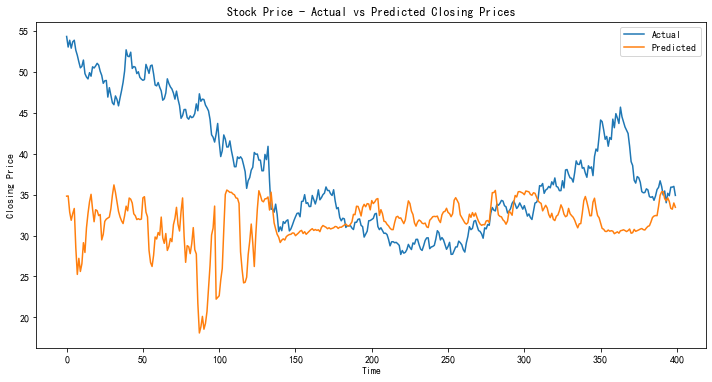

均方误差 (MSE):  108.65112347646593
均方根误差 (RMSE):  10.42358496278828


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-2000:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['volume']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## high,low,volume,RSI

Epoch 1/50
25/25 [==============================] - 5s 8ms/step - loss: 0.0555
Epoch 2/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 4/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 5/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 6/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 7/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 8/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 9/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 10/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 11/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0015
Epoch 12/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0015
Epoch 13/50
25/25 [===========================

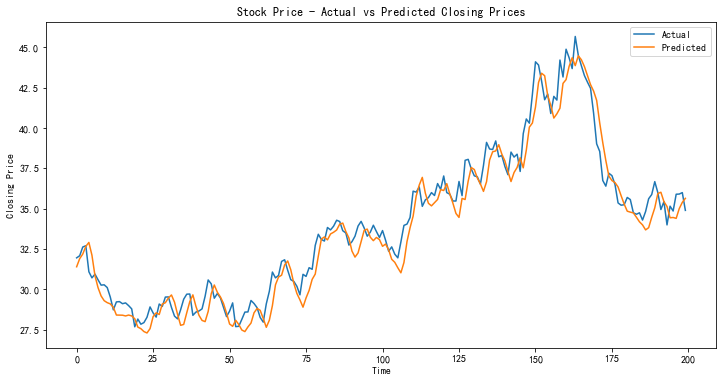

均方误差 (MSE):  1.04088281050334
均方根误差 (RMSE):  1.0202366443641102


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-1000:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['high','low','volume','RSI']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## 涨幅 预测

Epoch 1/50
25/25 [==============================] - 5s 9ms/step - loss: 0.1101
Epoch 2/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0714
Epoch 3/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0680
Epoch 4/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0685
Epoch 5/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0676
Epoch 6/50
25/25 [==============================] - 0s 11ms/step - loss: 0.0681
Epoch 7/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0672
Epoch 8/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0676
Epoch 9/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0679
Epoch 10/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0682
Epoch 11/50
25/25 [==============================] - 0s 11ms/step - loss: 0.0685
Epoch 12/50
25/25 [==============================] - 0s 12ms/step - loss: 0.0681
Epoch 13/50
25/25 [====================

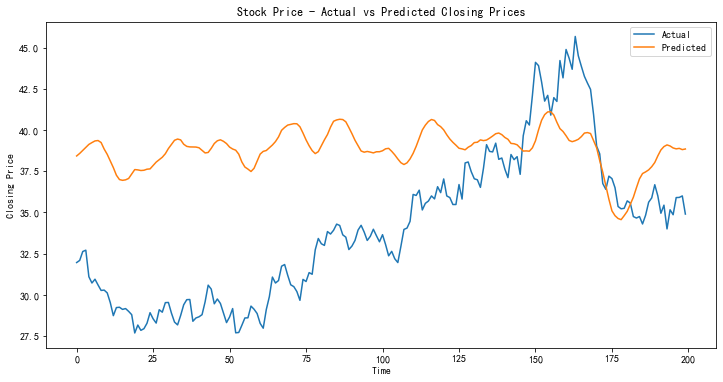

均方误差 (MSE):  41.97947854424469
均方根误差 (RMSE):  6.479157240277835


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-1000:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['涨幅']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## *volume,RSI 预测

Epoch 1/50
25/25 [==============================] - 5s 10ms/step - loss: 0.1056
Epoch 2/50
25/25 [==============================] - 0s 11ms/step - loss: 0.0662
Epoch 3/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0595
Epoch 4/50
25/25 [==============================] - 0s 12ms/step - loss: 0.0553
Epoch 5/50
25/25 [==============================] - 0s 13ms/step - loss: 0.0543
Epoch 6/50
25/25 [==============================] - 0s 12ms/step - loss: 0.0531
Epoch 7/50
25/25 [==============================] - 0s 12ms/step - loss: 0.0534
Epoch 8/50
25/25 [==============================] - 0s 11ms/step - loss: 0.0528
Epoch 9/50
25/25 [==============================] - 0s 10ms/step - loss: 0.0541
Epoch 10/50
25/25 [==============================] - 0s 12ms/step - loss: 0.0516
Epoch 11/50
25/25 [==============================] - 0s 12ms/step - loss: 0.0525
Epoch 12/50
25/25 [==============================] - 0s 12ms/step - loss: 0.0518
Epoch 13/50
25/25 [==================

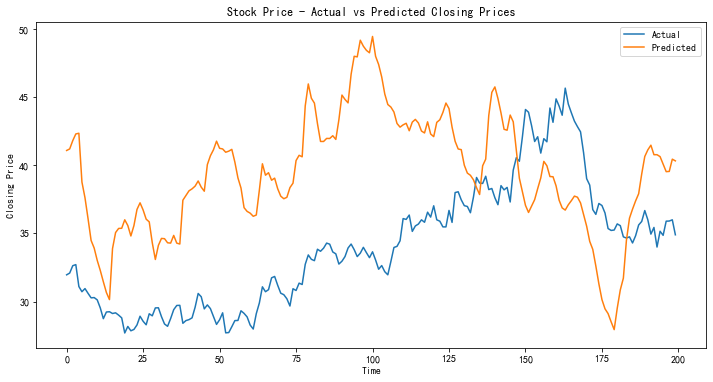

均方误差 (MSE):  62.792060380152726
均方根误差 (RMSE):  7.924144141808169


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-1000:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['volume','RSI']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)

## MACD_Histogram

Epoch 1/50
50/50 [==============================] - 5s 8ms/step - loss: 0.0637
Epoch 2/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0548
Epoch 3/50
50/50 [==============================] - 1s 10ms/step - loss: 0.0528
Epoch 4/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0524
Epoch 5/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0517
Epoch 6/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0486
Epoch 7/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0460
Epoch 8/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0439
Epoch 9/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0439
Epoch 10/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0435
Epoch 11/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0438
Epoch 12/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0439
Epoch 13/50
50/50 [=========================

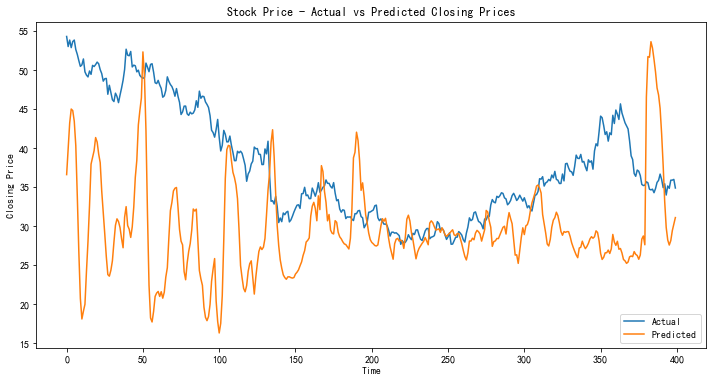

均方误差 (MSE):  151.44341989537196
均方根误差 (RMSE):  12.306235000818567


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('海康威视_clean_MaxMin.csv')[-2000:]  # 假设数据存储在名为stock_data.csv的文件中

# 选择需要使用的特征列
selected_features = ['volume','MACD_Histogram']  # 假设这是您要使用的特征列名称

# 提取特征列数据
features = data[selected_features].values

# 提取目标变量（收盘价）
target = data['close'].values

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# 创建训练集和测试集
train_size = int(len(scaled_features) * 0.8)
train_features = scaled_features[:train_size]
train_target = scaled_target[:train_size]
test_features = scaled_features[train_size:]
test_target = scaled_target[train_size:]

# 定义滑动窗口大小
window_size = 10

# 创建输入序列和输出序列
X_train, y_train = [], []
for i in range(window_size, len(train_features)):
    X_train.append(train_features[i - window_size:i])
    y_train.append(train_target[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# 构建LSTM模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 创建测试集的输入序列
inputs = scaled_features[len(scaled_features) - len(test_features) - window_size:]
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i - window_size:i])
X_test = np.array(X_test)

# 转换为LSTM可接受的输入格式 [样本数，时间步数，特征数]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# 使用模型进行预测
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 反归一化预测结果
actual_prices = scaler.inverse_transform(test_target)

# 绘制实际收盘价和预测收盘价的走势
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title('Stock Price - Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# 计算均方误差（MSE）
mse = mean_squared_error(actual_prices, predicted_prices)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)

print("均方误差 (MSE): ", mse)
print("均方根误差 (RMSE): ", rmse)